# Lab #4
___

**Task:** Train a SVM for a given dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from svm import SVM
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize, StandardScaler
import pandas as pd
from misc.estimators import accuracy
from kernels import rbf
import seaborn as sns

## Dataset reading

In [2]:
data = pd.read_csv("../datasets/data10.csv", sep=";", header=None)
data.head()

,0,1,2
0,0.195,0.186,0
1,0.144,0.229,0
2,0.701,0.677,1
3,0.735,0.481,1
4,0.713,0.307,1


## Data preprocessing
___

We will change target variable values on {-1, 1}.

In [3]:
X, Y = data.iloc[:, :-1].to_numpy(), data.iloc[:, -1].to_numpy()

# Change values of target variable
Y[Y == 0] = -1

# Divide dataset on train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

## SVM initialization and train

#### Find best param for SVM:

Best value: 0.09846938775510206


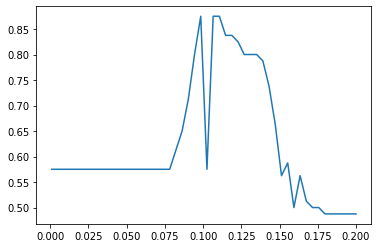

In [4]:
x = np.linspace(.001, .2, 50)
y = []
for l in x:
    svm = SVM(l=l, kernel=lambda _X, w: rbf(_X, w, 1))
    svm.train(X_train, Y_train)
    predictions = svm.predict(X_train)
    y.append(accuracy(Y_train, predictions))

plt.plot(x, y)

print(f"Best value: {x[np.argmax(y)]}")

In [5]:
svm = SVM(l=x[np.argmax(y)], kernel=lambda _X, w: rbf(_X, w, 1))
svm.train(X_train, Y_train)

## Estimations

In [6]:
predictions = svm.predict(X_test)

#### Accuracy:

In [7]:
accuracy(Y_test, predictions)

0.9

## Using SVM from sklearn
___
Also, we will find best params for SVM using grid search

In [8]:
skl_svm = SVC()

parameters = {"C": np.linspace(1, 100, 20)}
clf = GridSearchCV(skl_svm, parameters).fit(X_train, Y_train)

clf.best_params_

{'C': 1.0}

## Estimations

In [9]:
skl_predictions = clf.predict(X_test)

#### Accuracy:

In [10]:
accuracy(Y_test, skl_predictions)

0.95